**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

## Clustering

In [1]:
# Importando as bibliotecas para os modelos
import pandas as pd

from googledrivedownloader import download_file_from_google_drive as gdd

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

## Tarefa #1: Recebendo os dados

In [13]:
data_google_id = '1lpRg4OQQbDoZUsxGzIFpFD4AbFA1H0x1'
gdd(file_id=data_google_id,
    dest_path = './Mall.csv',
    showsize = True)
dados = pd.read_csv("Mall.csv", sep=',')

In [14]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Esse conjunto de dados ilustra alguns dados dos consumidores de um shopping. **Será que podemos encontrar grupos de consumidores com os dados acima?**

Vamos primeiro analisar os nossos dados.

## Tarefa #2: Analisando os dados

A seguir vamos analisar os tipos de dados que temos.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dados.shape

(200, 5)

In [6]:
dados.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

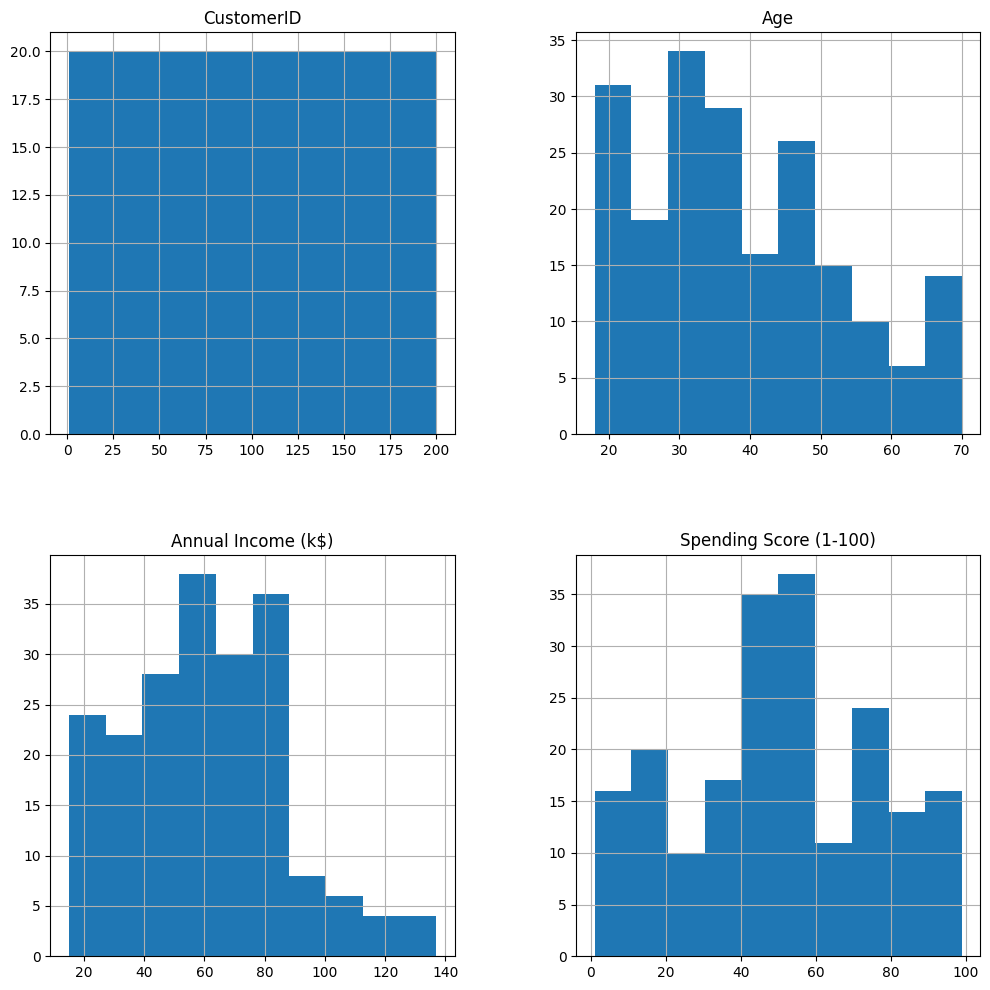

In [8]:
dados.hist(figsize=(12,12))

In [9]:
dados['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


Boa proporção entre os generos que temos disponíveis em nossos dados.

Vamos fazer um gráfico completo com todos os dados para checarmos possíveis agrupamentos que podem ser realizados.

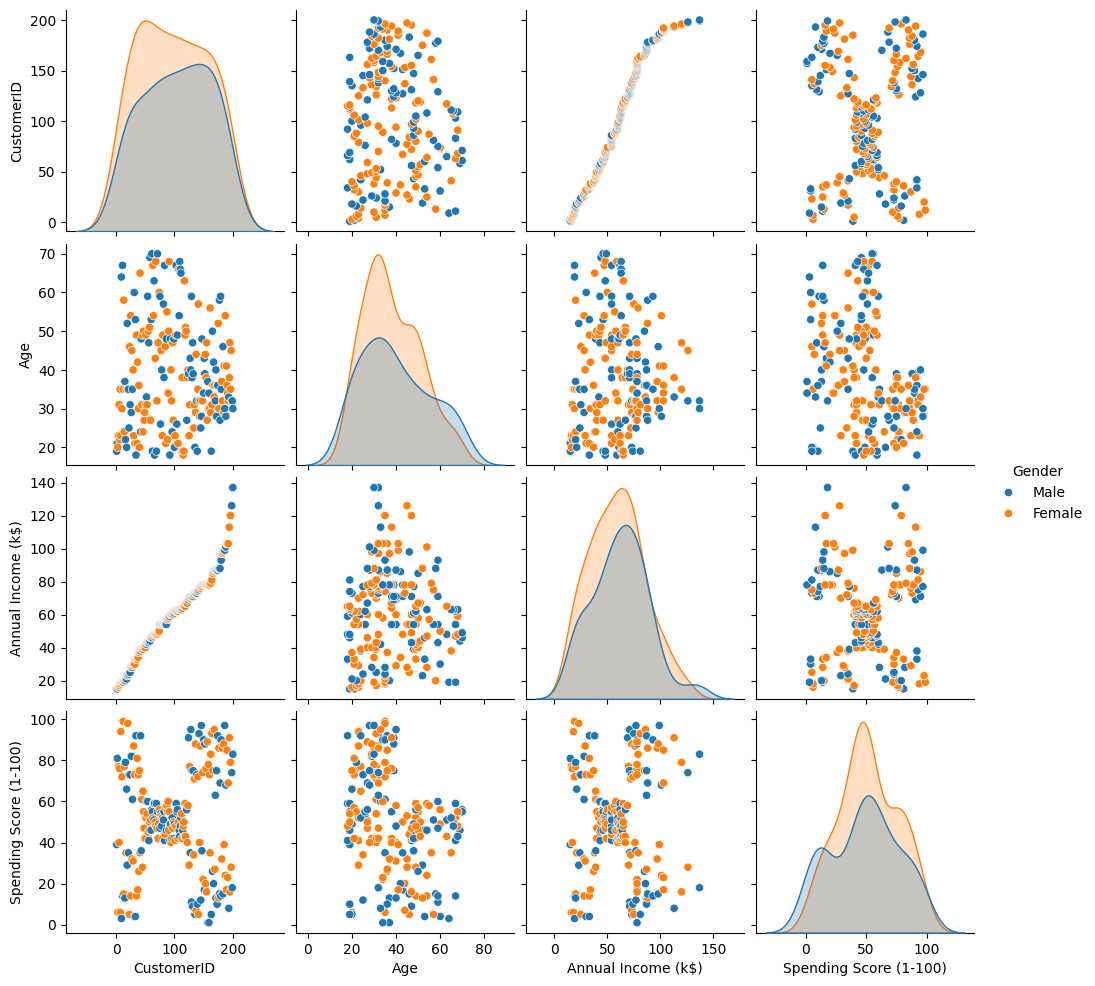

In [10]:
sns.pairplot(dados, hue ='Gender')

Aparentemente o Annual Income e o Spending Score permitem alguns agrupamentos dos nossos dados. Podemos trabalhar com eles.

## Tarefa #3: Criando os agrupamentos

Vamos criar agrupamentos com diferentes metodologias:

### K-MEANS

In [15]:
from sklearn.cluster import KMeans

In [19]:
# Instanciar k means
kmeans = KMeans(n_clusters=6, random_state=0)

# Encontrando o centro dos grupos
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)' ]])

# Salvando os centroides de cada agrupamento
centroides = kmeans.cluster_centers_

# Rótulos dos kmeans
kmeans_rotulos = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)' ]])


Vamos analisar a nossa previsao e os centroides:

In [20]:
kmeans_rotulos #Salva em numpy arrays

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 4, 5, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [22]:
pd.Series(kmeans_rotulos).value_counts()

,count
0,49
4,39
1,39
2,32
3,21
5,20


In [23]:
centroides

array([[62.73469388, 46.91836735],
       [86.53846154, 82.12820513],
       [89.40625   , 15.59375   ],
       [25.14285714, 19.52380952],
       [45.51282051, 51.51282051],
       [24.95      , 81.        ]])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

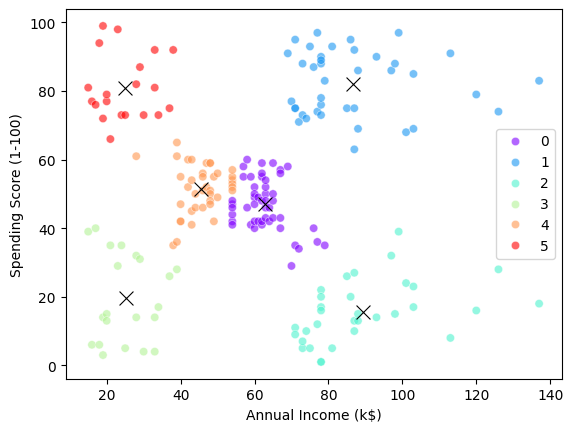

In [32]:
sns.scatterplot(x=dados['Annual Income (k$)'], y=dados['Spending Score (1-100)'], hue=kmeans_rotulos, palette ='rainbow', alpha = 0.6)

sns.scatterplot(x=centroides[:,0], y=centroides[:,1], color='black', marker='x', s=100)

Escolhendo a quantidade de grupos usando o método do "cotovelo":

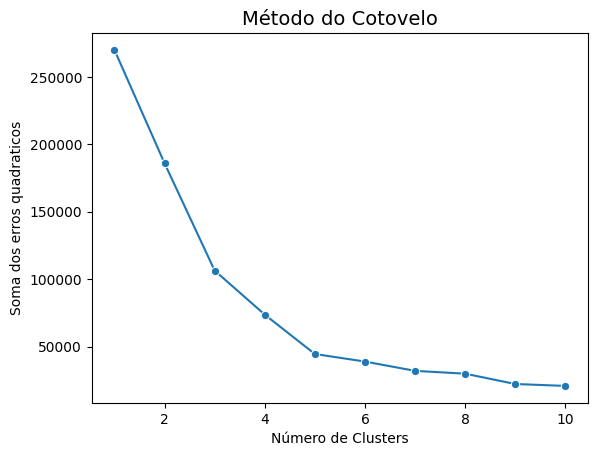

In [31]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)' ]])

    sse.append(kmeans.inertia_)

sns.lineplot(x=list(range(1,11)), y=sse, marker='o')
plt.title("Método do Cotovelo", fontsize = 14)
plt.xlabel("Número de Clusters")
plt.ylabel("Soma dos erros quadraticos")
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

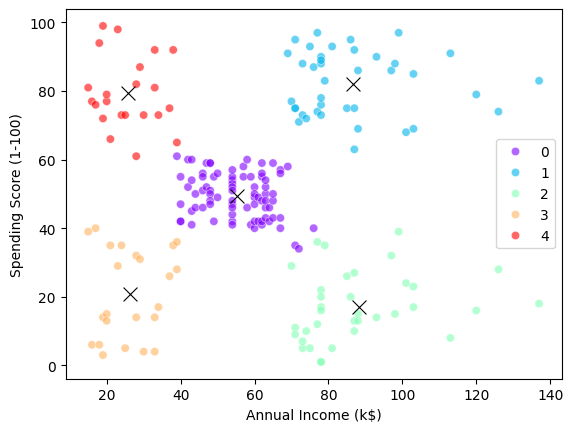

In [33]:
# Instanciar k means
kmeans = KMeans(n_clusters=5, random_state=0)

# Encontrando o centro dos grupos
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)' ]])

# Salvando os centroides de cada agrupamento
centroides = kmeans.cluster_centers_

# Rótulos dos kmeans
kmeans_rotulos = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)' ]])

sns.scatterplot(x=dados['Annual Income (k$)'], y=dados['Spending Score (1-100)'], hue=kmeans_rotulos, palette ='rainbow', alpha = 0.6)

sns.scatterplot(x=centroides[:,0], y=centroides[:,1], color='black', marker='x', s=100)


### Agrupamento Hierarquico

In [34]:
# Com Scikit Learn
from sklearn.cluster import AgglomerativeClustering

In [35]:
# Instanciando o modelo
modelo = AgglomerativeClustering(n_clusters=5, linkage='ward')
modelo.fit(dados[['Annual Income (k$)','Spending Score (1-100)' ]])

hierariquico_rotulo = modelo.labels_
hierariquico_rotulo

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0.5, 1.0, 'Agrupamento Hierarquico')

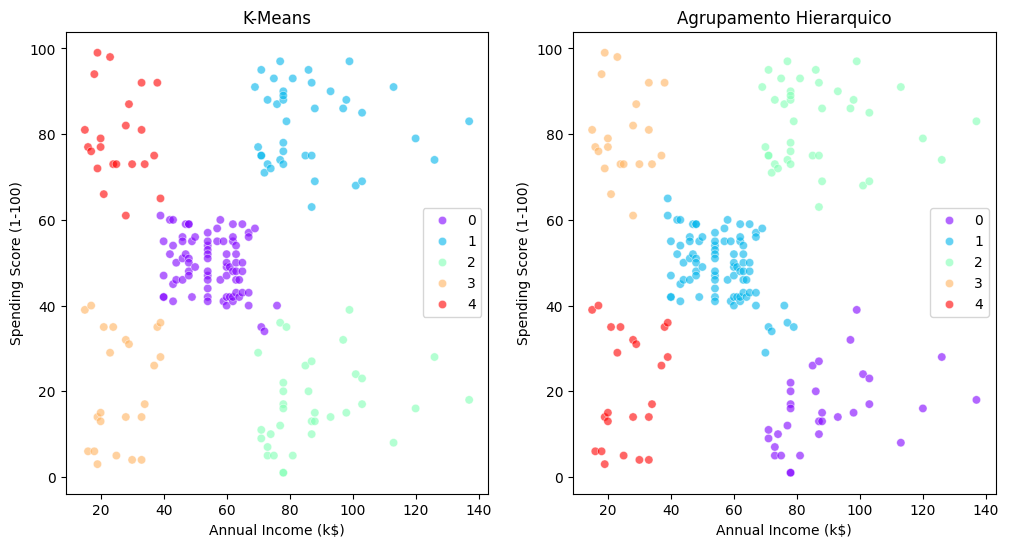

In [40]:
fig,eixo = plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x=dados['Annual Income (k$)'], y=dados['Spending Score (1-100)'], hue=kmeans_rotulos, palette ='rainbow', alpha = 0.6, ax=eixo[0])

sns.scatterplot(x=dados['Annual Income (k$)'], y=dados['Spending Score (1-100)'], hue=hierariquico_rotulo, palette ='rainbow', alpha = 0.6, ax=eixo[1])

eixo[0].set_title("K-Means")
eixo[1].set_title("Agrupamento Hierarquico")

# Tarefa #4: Avaliando as Métricas

- Vamos começar avaliando a métrica de Adjusted Rand index:

In [37]:
from sklearn.metrics import adjusted_rand_score, silhouette_score


Comparação entre K-Means e Agrupamento Hierarquico:

- Vamos começar avaliando a métrica de Silhouette:

KMEANS:

Agrupamento Hierarquico: